In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

In [108]:
city_data = pd.read_csv('raw_data/city_data.csv')
ride_data = pd.read_csv('raw_data/ride_data.csv')
print(ride_data.head())
print('---------------------------------------------------------------')
print(city_data.head())

city_data = city_data.drop_duplicates('city', keep = 'first')


          city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673
---------------------------------------------------------------
             city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban


In [153]:
#city_type = city_data.set_index('city')['type']
#city_type.head()

urban.mean()

Average Fare     24.603991
Total Drivers    24.621212
Total Riders     24.621212
dtype: float64

In [110]:
combined_data = pd.merge(ride_data, city_data, on='city')
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [111]:
city_groupby = combined_data.groupby('city')

avg_per_city = city_groupby['fare'].mean()
rides_per_city = city_groupby['ride_id'].count()
drivers_per_city = city_groupby['driver_count'].count()
city_type = city_data.set_index('city')['type']

city_info = pd.DataFrame({'Average Fare': avg_per_city,
                         'Total Riders': rides_per_city,
                         'Total Drivers': drivers_per_city,
                         'City Type': city_type})
city_info.head()

,Average Fare,City Type,Total Drivers,Total Riders
Alvarezhaven,23.928710,Urban,31,31
Alyssaberg,20.609615,Urban,26,26
Anitamouth,37.315556,Suburban,9,9
Antoniomouth,23.625000,Urban,22,22
Aprilchester,21.981579,Urban,19,19


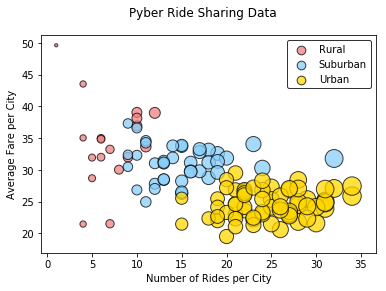

In [134]:
#seperate by city type
rural = city_info[city_info['City Type']=='Rural']
suburban = city_info[city_info['City Type']=='Suburban']
urban = city_info[city_info['City Type']=='Urban']

#set colors for city type
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
citycolors = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

# three scatter plots for each city type
plt.scatter(rural['Total Riders'], rural['Average Fare'], s = rural['Total Drivers']*10, color = citycolors['Rural'] , edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Total Riders'], suburban['Average Fare'], s = suburban['Total Drivers']*10, color = citycolors['Suburban'] , edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Total Riders'], urban['Average Fare'], s = urban['Total Drivers']*10, color = citycolors['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.suptitle('Pyber Ride Sharing Data')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

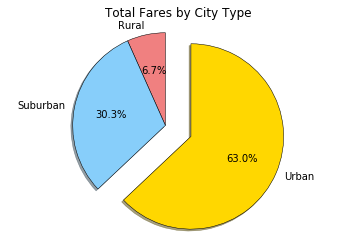

In [141]:
#group by type for pie chart
merge_type = combined_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
#total fare by city
fare_sum = merge_type.sum()['fare']
#pie chart build
labels = fare_sum.index
#colors for pie charts
colors = [citycolors[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
#pie chart
plt.title('Total Fares by City Type')
plt.axis('equal')
plt.show()

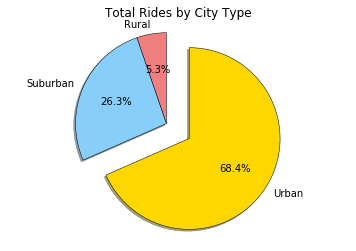

In [129]:
# number of ride per city type
rider_sum = merge_type.count()['ride_id']
#pie chart
labels = rider_sum.index
plt.pie(rider_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Total Rides by City Type')
plt.axis('equal')
plt.show()

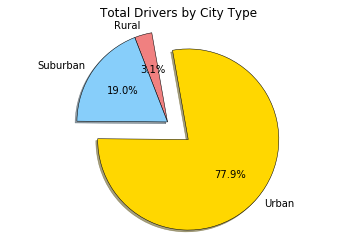

In [133]:
#driver per city type
driver_sum = city_data.groupby('type').sum()['driver_count']
#pie chart
labels = driver_sum.index
plt.pie(driver_sum, startangle = 100, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Total Drivers by City Type')
plt.axis('equal')
plt.show()